# GEONE - multiGaussian estimation and simulation

This notebook introduces general stuff about multiGaussian estimation and simulation in geone:
- functions for kriging and sequential Gaussian simulation (SGS) in a grid,
- unique wrapper for these functions,
- available elementary covariance models (illustrated in 1D)

## Functions for kriging and SGS in a grid

### Kriging
- `geone.grf.krige<d>D`: kriging based on Fast Fourier Transform (fft) in `<d>` dimension
- `geone.geosclassicinterface.estimate<d>D`: kriging, classic with specified search neighborhood, in `<d>` dimension

### SGS
- `geone.grf.grf<d>D`: SGS based on Fast Fourier Transform (fft) in `<d>` dimension
- `geone.geosclassicinterface.simulate<d>D`: SGS, classic with specified search neighborhood, in `<d>` dimension

### Output
- `geone.grf.krige<d>D` and `geone.grf.grf<d>D` return numpy arrays
- `geone.geosclassicinterface.estimate<d>D` and `geone.geosclassicinterface.simulate<d>D` return "images" (class `geone.img.Img`)

**Notebooks of examples.** For detailed examples illustrating these functions, see the following jupyter notebooks:
- functions based on fft:
    - `ex_grf_1d.ipynb`: example for the generation of 1D fields
    - `ex_grf_2d.ipynb`: example for the generation of 2D fields
    - `ex_grf_3d.ipynb`: example for the generation of 3D fields
- functions based on classic with search neighborhood:
    - `ex_geosclassic_1d.ipynb`:example in 1D for two-point statistics simulation and estimation
    - `ex_geosclassic_1d_non_stat_cov.ipynb`:example in 1D with non-stationary covariance model
    - `ex_geosclassic_2d.ipynb`:example in 2D for two-point statistics simulation and estimation
    - `ex_geosclassic_2d_non_stat_cov.ipynb`:example in 2D with non-stationary covariance model
    - `ex_geosclassic_3d.ipynb`:example in 3D for two-point statistics simulation and estimation
    - `ex_geosclassic_3d_non_stat_cov.ipynb`:example in 3D with non-stationary covariance model

## One wrapper: function `geone.multiGaussian.multiGaussianRun`
The following keyword arguments control which function is used:

|keyword argument | |
|:--- |:---|
| `mode='simulation', algo='fft'`    | wrapper for `geone.grf.grf<d>D`|
| `mode='simulation', algo='classic'`| wrapper for `geone.geosclassicinterface.simulate<d>D`|
| `mode='estimation', algo='fft'`    | wrapper for `geone.grf.krige<d>D`|
| `mode='estimation', algo='classic'`| wrapper for `geone.geosclassicinterface.estimate<d>D`|

where the dimension `<d>` is automatically detected. 

The keyword argument `output_mode` controls the "format" of the output:

|keyword argument | |
|:--- |:---|
| `output_mode='array'`| a numpy array is returned|
| `output_mode='img'`  | an "image" (class `geone.img.Img`) is returned|

Additional keyword arguments can be given (the relevant ones are passed).

**Note:** with `mode='simulation', algo='classic'`, setting also the keyword argument `use_multiprocessing=True` will launch `geone.geosclassicinterface.simulate<d>D_mp` instead of `geone.geosclassicinterface.simulate<d>D`, i.e. multiple processes will be used; by default `use_multiprocessing=False`. If `use_multiprocessing=True`, it is recommended to also specify the number of parallel processes and the number of threads per process with the keyword arguments `nproc` and `nthreads_per_proc` respectively.

## Elementary covariance models

An overview of elementary covariance models (1D) is proposed in this notebook.

### Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)
geone version: 1.2.17


### Remark
The matplotlib figures can be visualized in *interactive* mode:
- `%matplotlib notebook`: enable interactive mode
- `%matplotlib inline`: disable interactive mode

## Covariance model
The classes `geone.covModel.CovModel1D`, `geone.covModel.CovModel2D`, `geone.covModel.CovModel3D` allow to define covariance model with several elementary contributions (list of elementary models), and with anisotropies and specified orientation for 2D and 3D models (see doc of these classes for more details).

### Available elementary covariance models (1D)
An elementary model is defined by a 2-tuple, whose the first component is the type of the model given by a string and the second component is a dictionary used to pass the required parameters. The available elementary models are given in the table below for 1D case. Note that for 2D (resp. 3D) the range 'r' is a sequence of 2 (resp. 3) floats instead of a float. 

| Type                    | Parameters (dict)                                                | Covariance function $C(h)$|
|:----                    |:----------                                                       |:----------|
|'nugget'                 |  'w' (float) weight                                              | $C(h) = w \cdot \mathbf{1}\{h=0\}$|
|'spherical'              |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - 3/2 t + 1/2 t^3)$|
|'exponential'            |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t)$|
|'gaussian'               |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t^2)$|
|'linear'                 |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - t)$|
|'cubic'                  |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - 7 t^2 + 35/4  t^3 - 7/2 t^5 + 3/4 t^7)$|
|'sinus_cardinal'         |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \sin(\pi t)/(\pi t)$|
|'gamma'                  |  'w' (float) weight, 'r' (float) range, 's' (float) power        | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = 1 / (1 + \alpha t)^s$, $\alpha = 20^{1/s} - 1$|
|'power'                  |  'w' (float) weight, 'r' (float) scale, 's' (float) power        | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = 1 - t^s$|
|'exponential_generalized'|  'w' (float) weight, 'r' (float) range, 's' (float) power        | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t^s)$|
|'matern'                 |  'w' (float) weight, 'r' (float) scale, 'nu' (float)             | $C(h) = w \cdot 1/(2^{\nu-1} \Gamma(\nu))\cdot u^\nu \cdot K_{\nu}(u),\ \ u = \sqrt(2\nu)/r \cdot \vert h\vert,\ \ \nu= nu$|

**Notes**

- $\mathbf{1}\{\textit{expression}\}$ denotes the indicator function with value 1 when the *expression* is true and 0 if it is false.
- $K_{\nu}$ is the modified Bessel function of the second kind of parameter $\nu$ (=`nu`); see below for more details about `matern` model
- the variogram function is defined as $\gamma(h) = C(0) - C(h) = w - C(h)$

## Covariance model

The classes `geone.covModel.CovModel1D`, `geone.covModel.CovModel2D`, `geone.covModel.CovModel3D` allow to define covariance model with several elementary contributions (list of elementary models), and with anisotropies and specified orientation for 2D and 3D models (see doc of these classes for more details).

### Available elementary covariance models (1D)
An elementary model is defined by a 2-tuple, whose the first component is the type of the model given by a string and the second component is a dictionary used to pass the required parameters. The available elementary models are given in the table below for 1D case. The parameters - given in a dictionary, keys: 'w': weight, 'r': range, 's': power, 'nu' - are float numbers, except for the range 'r' for 2D (resp. 3D) model which is a sequence of 2 (resp. 3) floats instead of a float. 

| Type                    | Parameters     | Covariance function $C(h)$|
|:----                    |:----------     |:----------|
|'nugget'                 |  'w'           | $C(h) = w \cdot \mathbf{1}\{h=0\}$|
|'spherical'              |  'w', 'r'      | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - 3/2 t + 1/2 t^3)$|
|'exponential'            |  'w', 'r'      | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t)$|
|'gaussian'               |  'w', 'r'      | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t^2)$|
|'linear'                 |  'w', 'r'      | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - t)$|
|'cubic'                  |  'w', 'r'      | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - 7 t^2 + 35/4  t^3 - 7/2 t^5 + 3/4 t^7)$|
|'sinus_cardinal'         |  'w', 'r'      | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \sin(\pi t)/(\pi t)$|
|'gamma'                  |  'w', 'r', 's' | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = 1 / (1 + \alpha t)^s$, $\alpha = 20^{1/s} - 1$|
|'power'                  |  'w', 'r', 's' | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = 1 - t^s$|
|'exponential_generalized'|  'w', 'r', 's' | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t^s)$|
|'matern'                 |  'w', 'r', 'nu'| $C(h) = w \cdot 1/(2^{\nu-1} \Gamma(\nu))\cdot u^\nu \cdot K_{\nu}(u),\ \ u = \sqrt(2\nu)/r \cdot \vert h\vert,\ \ \nu= nu$|

**Notes** 

- $\mathbf{1}\{\textit{expression}\}$ denotes the indicator function with value 1 when the *expression* is true and 0 if it is false.
- $K_{\nu}$ is the modified Bessel function of the second kind of parameter $\nu$ (=`nu`); see below for more details about `matern` model
- the variogram function is defined as $\gamma(h) = C(0) - C(h) = w - C(h)$

## Models: `spherical`, `exponential`, `gaussian`, `linear`, `cubic`

In [3]:
w = 2.0
r = 10.0
cov_model_sph = gn.covModel.CovModel1D(elem=[('spherical', {'w':w, 'r':10})], name='sph')
cov_model_exp = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':10})], name='exp')
cov_model_gau = gn.covModel.CovModel1D(elem=[('gaussian', {'w':w, 'r':10})], name='gau')
cov_model_lin = gn.covModel.CovModel1D(elem=[('linear', {'w':w, 'r':10})], name='lin')
cov_model_cub = gn.covModel.CovModel1D(elem=[('cubic', {'w':w, 'r':10})], name='cub')

cov_model_list = [cov_model_sph, cov_model_exp, cov_model_gau, cov_model_lin, cov_model_cub]

In [4]:
# Print sill and range
for cov_model in cov_model_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model sph: sill = 2.0, range = 10
Cov. model exp: sill = 2.0, range = 10
Cov. model gau: sill = 2.0, range = 10
Cov. model lin: sill = 2.0, range = 10
Cov. model cub: sill = 2.0, range = 10


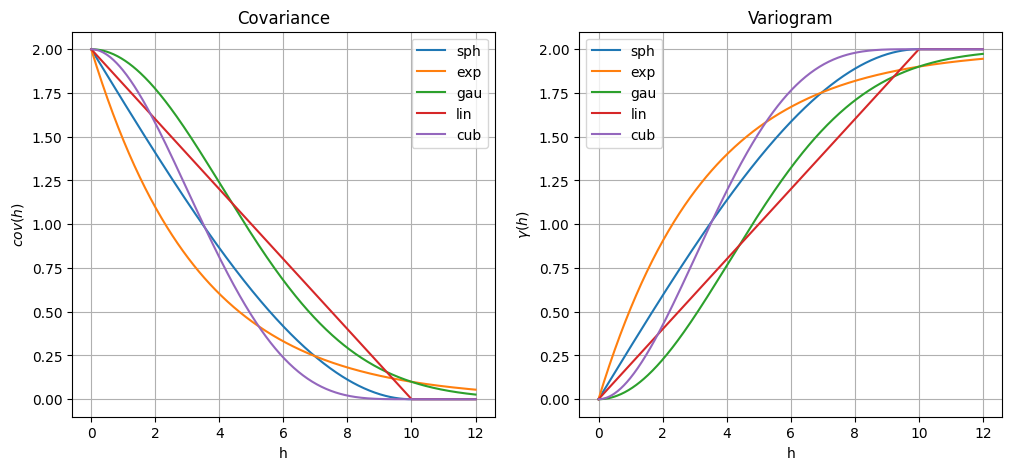

In [5]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_list:
    cov_model.plot_model(label=cov_model.name)
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `sinus_cardinal`

In [6]:
cov_model_sinc = gn.covModel.CovModel1D(elem=[('sinus_cardinal', {'w':w, 'r':10})], name='sinc')

In [7]:
# Print sill and range
cov_model = cov_model_sinc
print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model sinc: sill = 2.0, range = 10


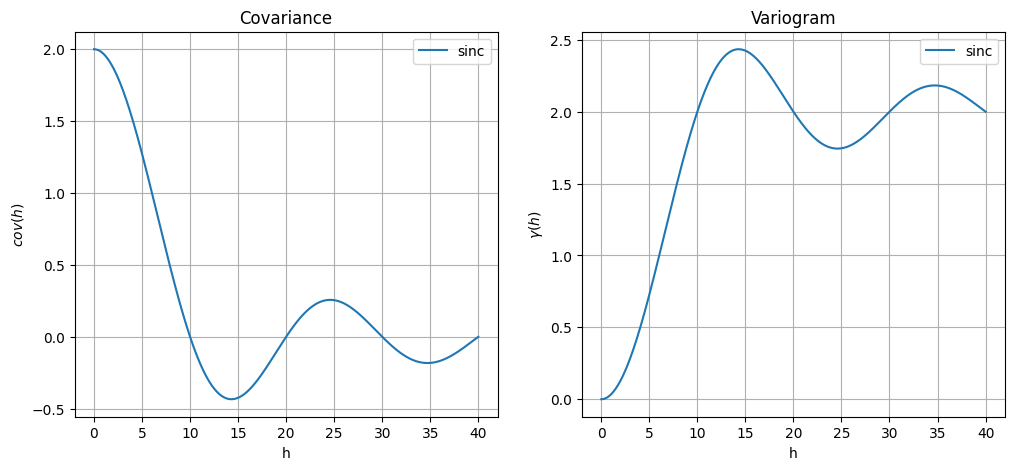

In [8]:
# Plot covariance and variogram
cov_model = cov_model_sinc

plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
cov_model.plot_model(label=cov_model.name, hmax=4.0*cov_model.r())
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
cov_model.plot_model(vario=True, label=cov_model.name, hmax=4.0*cov_model.r())
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `gamma`

In [9]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_gamma_list = [
    gn.covModel.CovModel1D(elem=[('gamma', {'w':w, 'r':10, 's':s})], name=f'gamma s={s}')
    for s in s_list]

In [10]:
# Print sill and range
for cov_model in cov_model_gamma_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model gamma s=0.2: sill = 2.0, range = 10
Cov. model gamma s=0.5: sill = 2.0, range = 10
Cov. model gamma s=1.0: sill = 2.0, range = 10
Cov. model gamma s=2.0: sill = 2.0, range = 10
Cov. model gamma s=3.0: sill = 2.0, range = 10
Cov. model gamma s=5.0: sill = 2.0, range = 10
Cov. model gamma s=10.0: sill = 2.0, range = 10


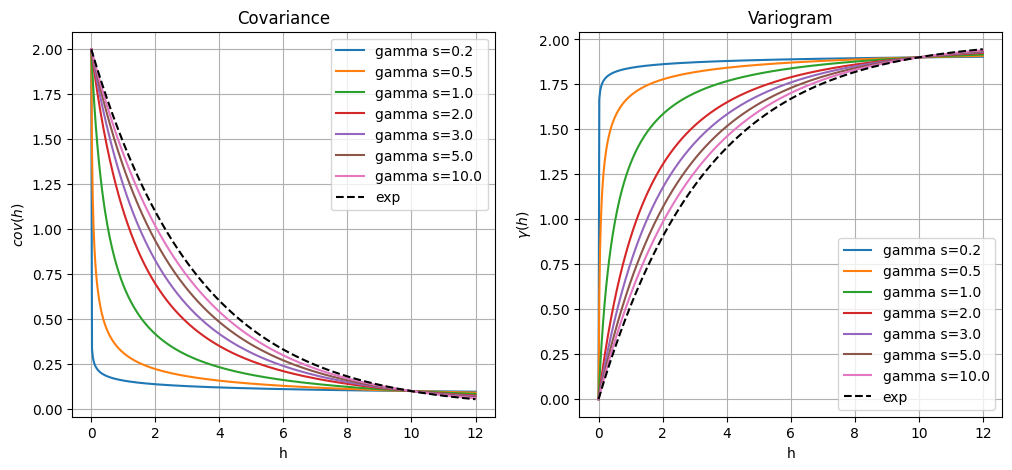

In [11]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_gamma_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_gamma_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `power`

**Warning: this is not a stationary model (does not reach a plateau / sill).**

In [12]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
cov_model_pow_list = [
    gn.covModel.CovModel1D(elem=[('power', {'w':w, 'r':10, 's':s})], name=f'pow s={s}')
    for s in s_list]

In [13]:
# Print sill and range
for cov_model in cov_model_pow_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model pow s=0.2: sill = 2.0, range = 10
Cov. model pow s=0.5: sill = 2.0, range = 10
Cov. model pow s=1.0: sill = 2.0, range = 10
Cov. model pow s=2.0: sill = 2.0, range = 10
Cov. model pow s=3.0: sill = 2.0, range = 10
Cov. model pow s=5.0: sill = 2.0, range = 10


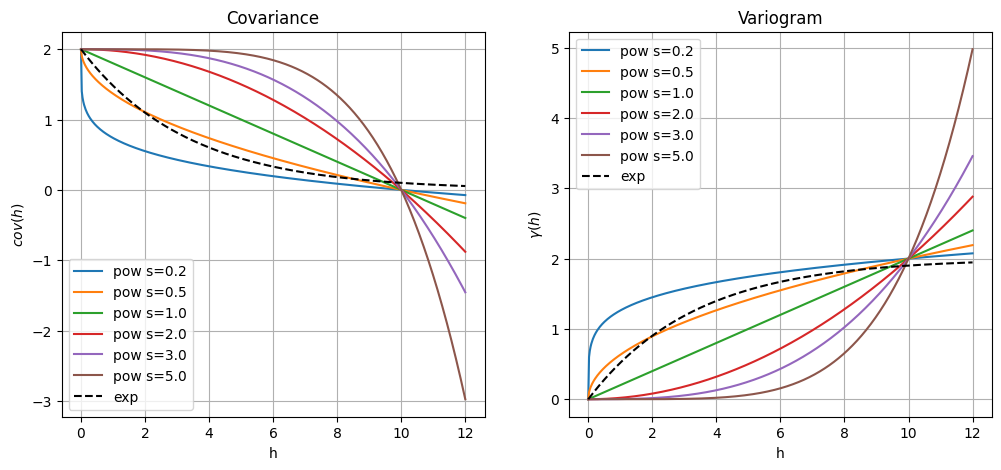

In [14]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_pow_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_pow_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `exponential_generalized`

In [15]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_exp_gen_list = [
    gn.covModel.CovModel1D(elem=[('exponential_generalized', {'w':w, 'r':10, 's':s})], name=f'exp gen s={s}')
    for s in s_list]

In [16]:
# Print sill and range
for cov_model in cov_model_exp_gen_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model exp gen s=0.2: sill = 2.0, range = 10
Cov. model exp gen s=0.5: sill = 2.0, range = 10
Cov. model exp gen s=1.0: sill = 2.0, range = 10
Cov. model exp gen s=2.0: sill = 2.0, range = 10
Cov. model exp gen s=3.0: sill = 2.0, range = 10
Cov. model exp gen s=5.0: sill = 2.0, range = 10
Cov. model exp gen s=10.0: sill = 2.0, range = 10


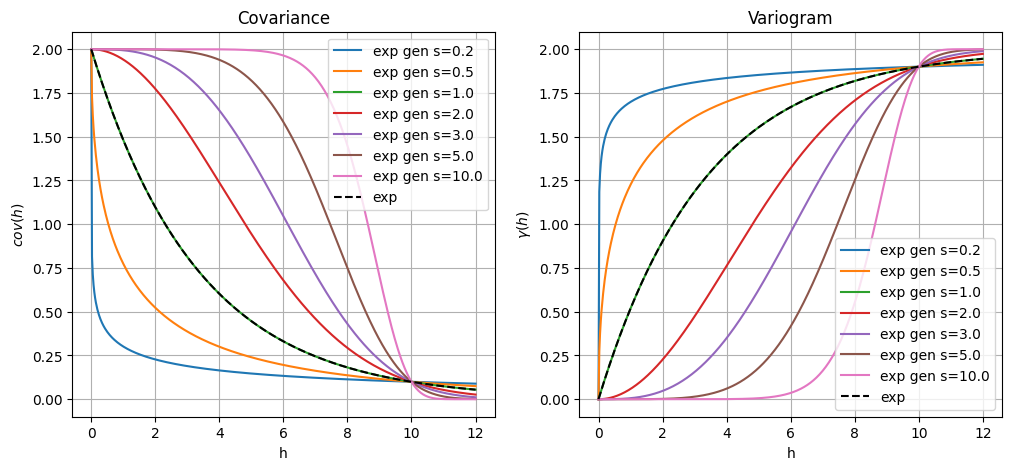

In [17]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_exp_gen_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_exp_gen_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `matern`

**Warning: the range is not equal to the parameter `r`, which is a "scale" parameter.**

- Covariance `matern` with parameters `w`, `r`, and `nu=0.5` is covariance `exponential` with parameters `w`, `3r`.
- Covariance `matern` with parameters `w`, `r`, and `nu` tends to covariance 'gaussian' with parameters `w`, $\sqrt{6}$ `r`, when `nu` tends to infinity.

In [18]:
w = 2.0
r = 10.0
nu_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_matern_list = [
    gn.covModel.CovModel1D(elem=[('matern', {'w':w, 'r':10, 'nu':nu})], name=f'matern nu={nu}, r={r}')
    for nu in nu_list]

In [19]:
# Print sill and range (cov_model.r() gives the range)
for cov_model in cov_model_matern_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model matern nu=0.2, r=10.0: sill = 2.0, range = 31.63139161186625
Cov. model matern nu=0.5, r=10.0: sill = 2.0, range = 29.957322735539908
Cov. model matern nu=1.0, r=10.0: sill = 2.0, range = 28.27382241179835
Cov. model matern nu=2.0, r=10.0: sill = 2.0, range = 26.841876278504646
Cov. model matern nu=3.0, r=10.0: sill = 2.0, range = 26.19786003151972
Cov. model matern nu=5.0, r=10.0: sill = 2.0, range = 25.590039613951095
Cov. model matern nu=10.0, r=10.0: sill = 2.0, range = 25.065105293108747


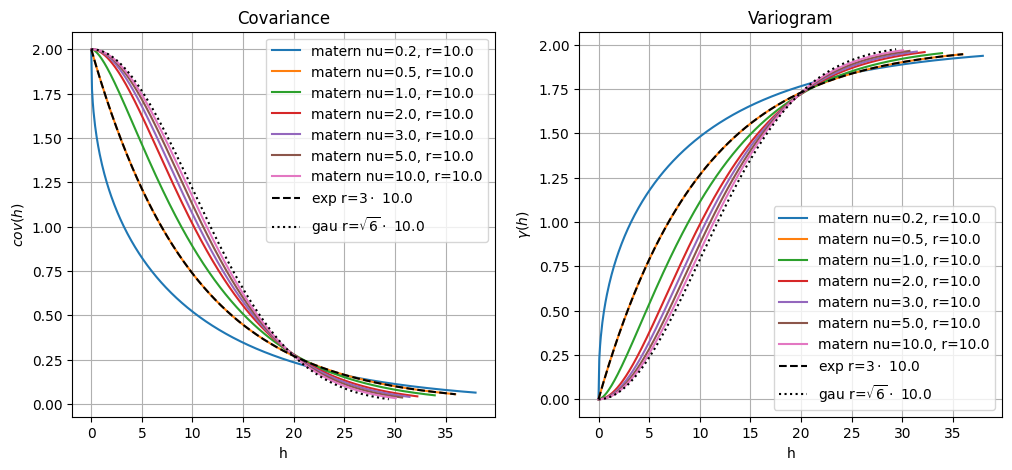

In [20]:
cov_model_expA = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':3*r})], 
                                        name=r'exp r=$3\cdot$' + f' {r}')
cov_model_gauA = gn.covModel.CovModel1D(elem=[('gaussian', {'w':w, 'r':np.sqrt(6)*r})], 
                                        name=r'gau r=$\sqrt{6}\cdot$' + f' {r}')

# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_matern_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_expA.plot_model(label=cov_model_expA.name, ls='dashed', color='black')
cov_model_gauA.plot_model(label=cov_model_gauA.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_matern_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_expA.plot_model(vario=True, label=cov_model_expA.name, ls='dashed', color='black')
cov_model_gauA.plot_model(vario=True, label=cov_model_gauA.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

### Parameters `r`, `nu` and "effective" range
The function `geone.covModel.cov_matern_get_r_param(nu, r_eff)` computes the parameter `r` (scale) such that the 1D-`matern` covariance model of parameters `r` and `nu` has an effective range of `r_eff` (approximately).

The function `geone.covModel.cov_matern_get_effective_range(nu, r)` computes the effective range `r_eff` of a 1D-`matern` covariance model of parameter `r` (scale) and `nu`.

In [21]:
r_eff = 10.0
nu_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
r_list = [gn.covModel.cov_matern_get_r_param(nu, r_eff) for nu in nu_list]
for nu, r in zip(nu_list, r_list):
    print(f'nu={nu}, r={r}')

nu=0.2, r=3.1614163937854056
nu=0.5, r=3.3380820069533206
nu=1.0, r=3.5368404930729085
nu=2.0, r=3.725521977764187
nu=3.0, r=3.817105667397543
nu=5.0, r=3.907770425860613
nu=10.0, r=3.989610210314705


/home/julien/anaconda3/envs/py311/lib/python3.11/site-packages/geone/covModel.py:380: RuntimeWarning: invalid value encountered in scalar power
  u1 = (0.5*u)**nu


In [22]:
cov_model_matern_list2 = [
    gn.covModel.CovModel1D(elem=[('matern', {'w':w, 'r':r, 'nu':nu})], name=f'matern nu={nu}, r={r:4.3f}')
    for nu, r in zip(nu_list, r_list)]

In [23]:
# Print sill and range (cov_model.r() gives the range)
for cov_model in cov_model_matern_list2:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model matern nu=0.2, r=3.161: sill = 2.0, range = 10.00000000000001
Cov. model matern nu=0.5, r=3.338: sill = 2.0, range = 9.99999999999994
Cov. model matern nu=1.0, r=3.537: sill = 2.0, range = 10.000000000000073
Cov. model matern nu=2.0, r=3.726: sill = 2.0, range = 10.000000000000002
Cov. model matern nu=3.0, r=3.817: sill = 2.0, range = 10.000000000000151
Cov. model matern nu=5.0, r=3.908: sill = 2.0, range = 9.999999999999964
Cov. model matern nu=10.0, r=3.990: sill = 2.0, range = 9.999999999999982


In [24]:
# Check
a = []
for cov_model in cov_model_matern_list2:
    nu, r = cov_model.elem[0][1]['nu'], cov_model.elem[0][1]['r']
    a.append(cov_model.r() == gn.covModel.cov_matern_get_effective_range(nu, r))

print(np.all(a)) # should be True

True


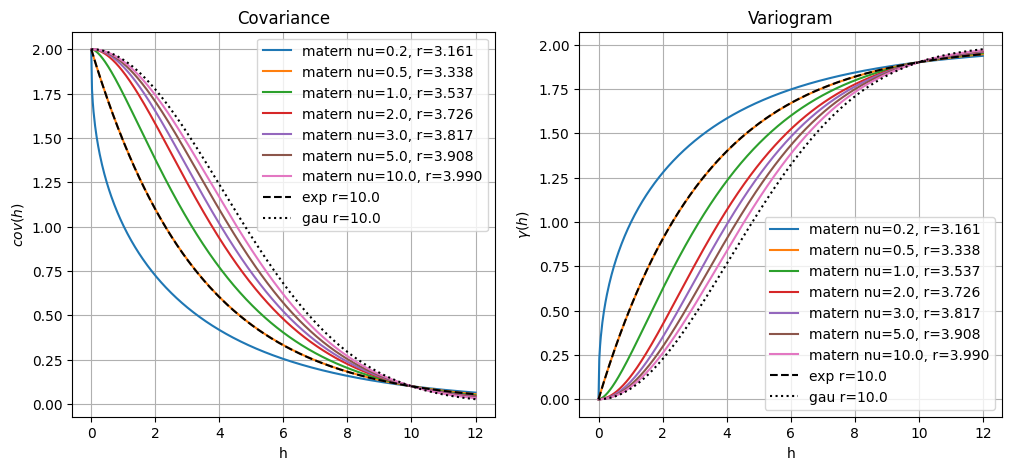

In [25]:
cov_model_expB = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':r_eff})], name=f'exp r={r_eff}')
cov_model_gauB = gn.covModel.CovModel1D(elem=[('gaussian', {'w':w, 'r':r_eff})], name=f'gau r={r_eff}')

# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_matern_list2:
    cov_model.plot_model(label=cov_model.name)
cov_model_expB.plot_model(label=cov_model_expB.name, ls='dashed', color='black')
cov_model_gauB.plot_model(label=cov_model_gauB.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_matern_list2:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_expB.plot_model(vario=True, label=cov_model_expB.name, ls='dashed', color='black')
cov_model_gauB.plot_model(vario=True, label=cov_model_gauB.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()